In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Step 1: Load the dataset
data_url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'
data = pd.read_csv(data_url)
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The data has 1000 rows × 40 columns

In [10]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [11]:
data.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [12]:
data.shape

(1000, 40)

data has 1000 rows × 40 columns out of which 1 is target and remaining are independent variable

In [13]:
data.columns
data.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [14]:
#checking the null values
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are no null values in the data frame

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

<AxesSubplot:>

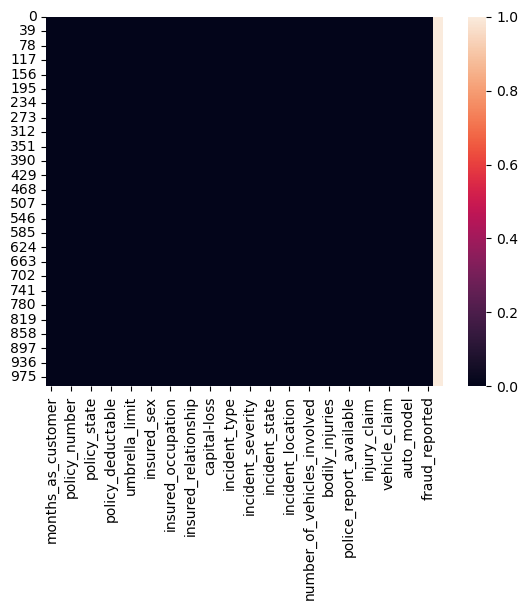

In [16]:
import seaborn as sns
sns.heatmap(data.isnull())

As there is  single colour so there are no null values as seen above also

In [17]:
# to check unique vqlues
data['fraud_reported'].unique()


array(['Y', 'N'], dtype=object)

.The out put has binary classification problem. as the nuber of unique outcome is 2 
the ration of unique values to total number of 1000 rows is 2/1000=.002

In [18]:
data['auto_year'].nunique()# number of unique values


21

In [13]:
data['incident_severity'].nunique()# number of unique values


4

In [14]:
data['bodily_injuries'].nunique()# number of unique values

3

In [19]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")
    

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [20]:
data["fraud_reported"].unique()
data.shape[0]


1000

In [21]:
data.loc[data["fraud_reported"]==" "]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39


no null values

In [22]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [19]:
#checking the unique values in each column
data.nunique().to_frame("No.of unique value")

,No.of unique value
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [23]:
numerical_columns = data.select_dtypes(include="number").columns
print(numerical_columns)


Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', '_c39'],
      dtype='object')


In [24]:
categorical_colm = []
for i in data.columns:
    if data[i].dtype == "object":
        categorical_colm.append(i)

print("Categorical columns:", categorical_colm)


Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


 data visualization

N    753
Y    247
Name: fraud_reported, dtype: int64


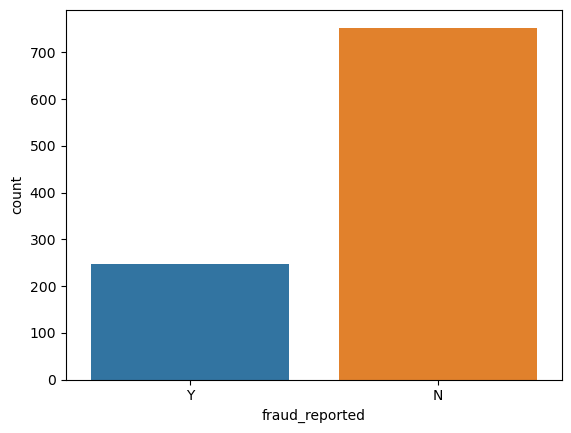

In [25]:

import seaborn as sns

if data["fraud_reported"].notnull().any():
    sns.countplot(x='fraud_reported', data=data)
    print(data["fraud_reported"].value_counts())
else:
    print("The 'fraud_reported' column does not contain any non-null values.")



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

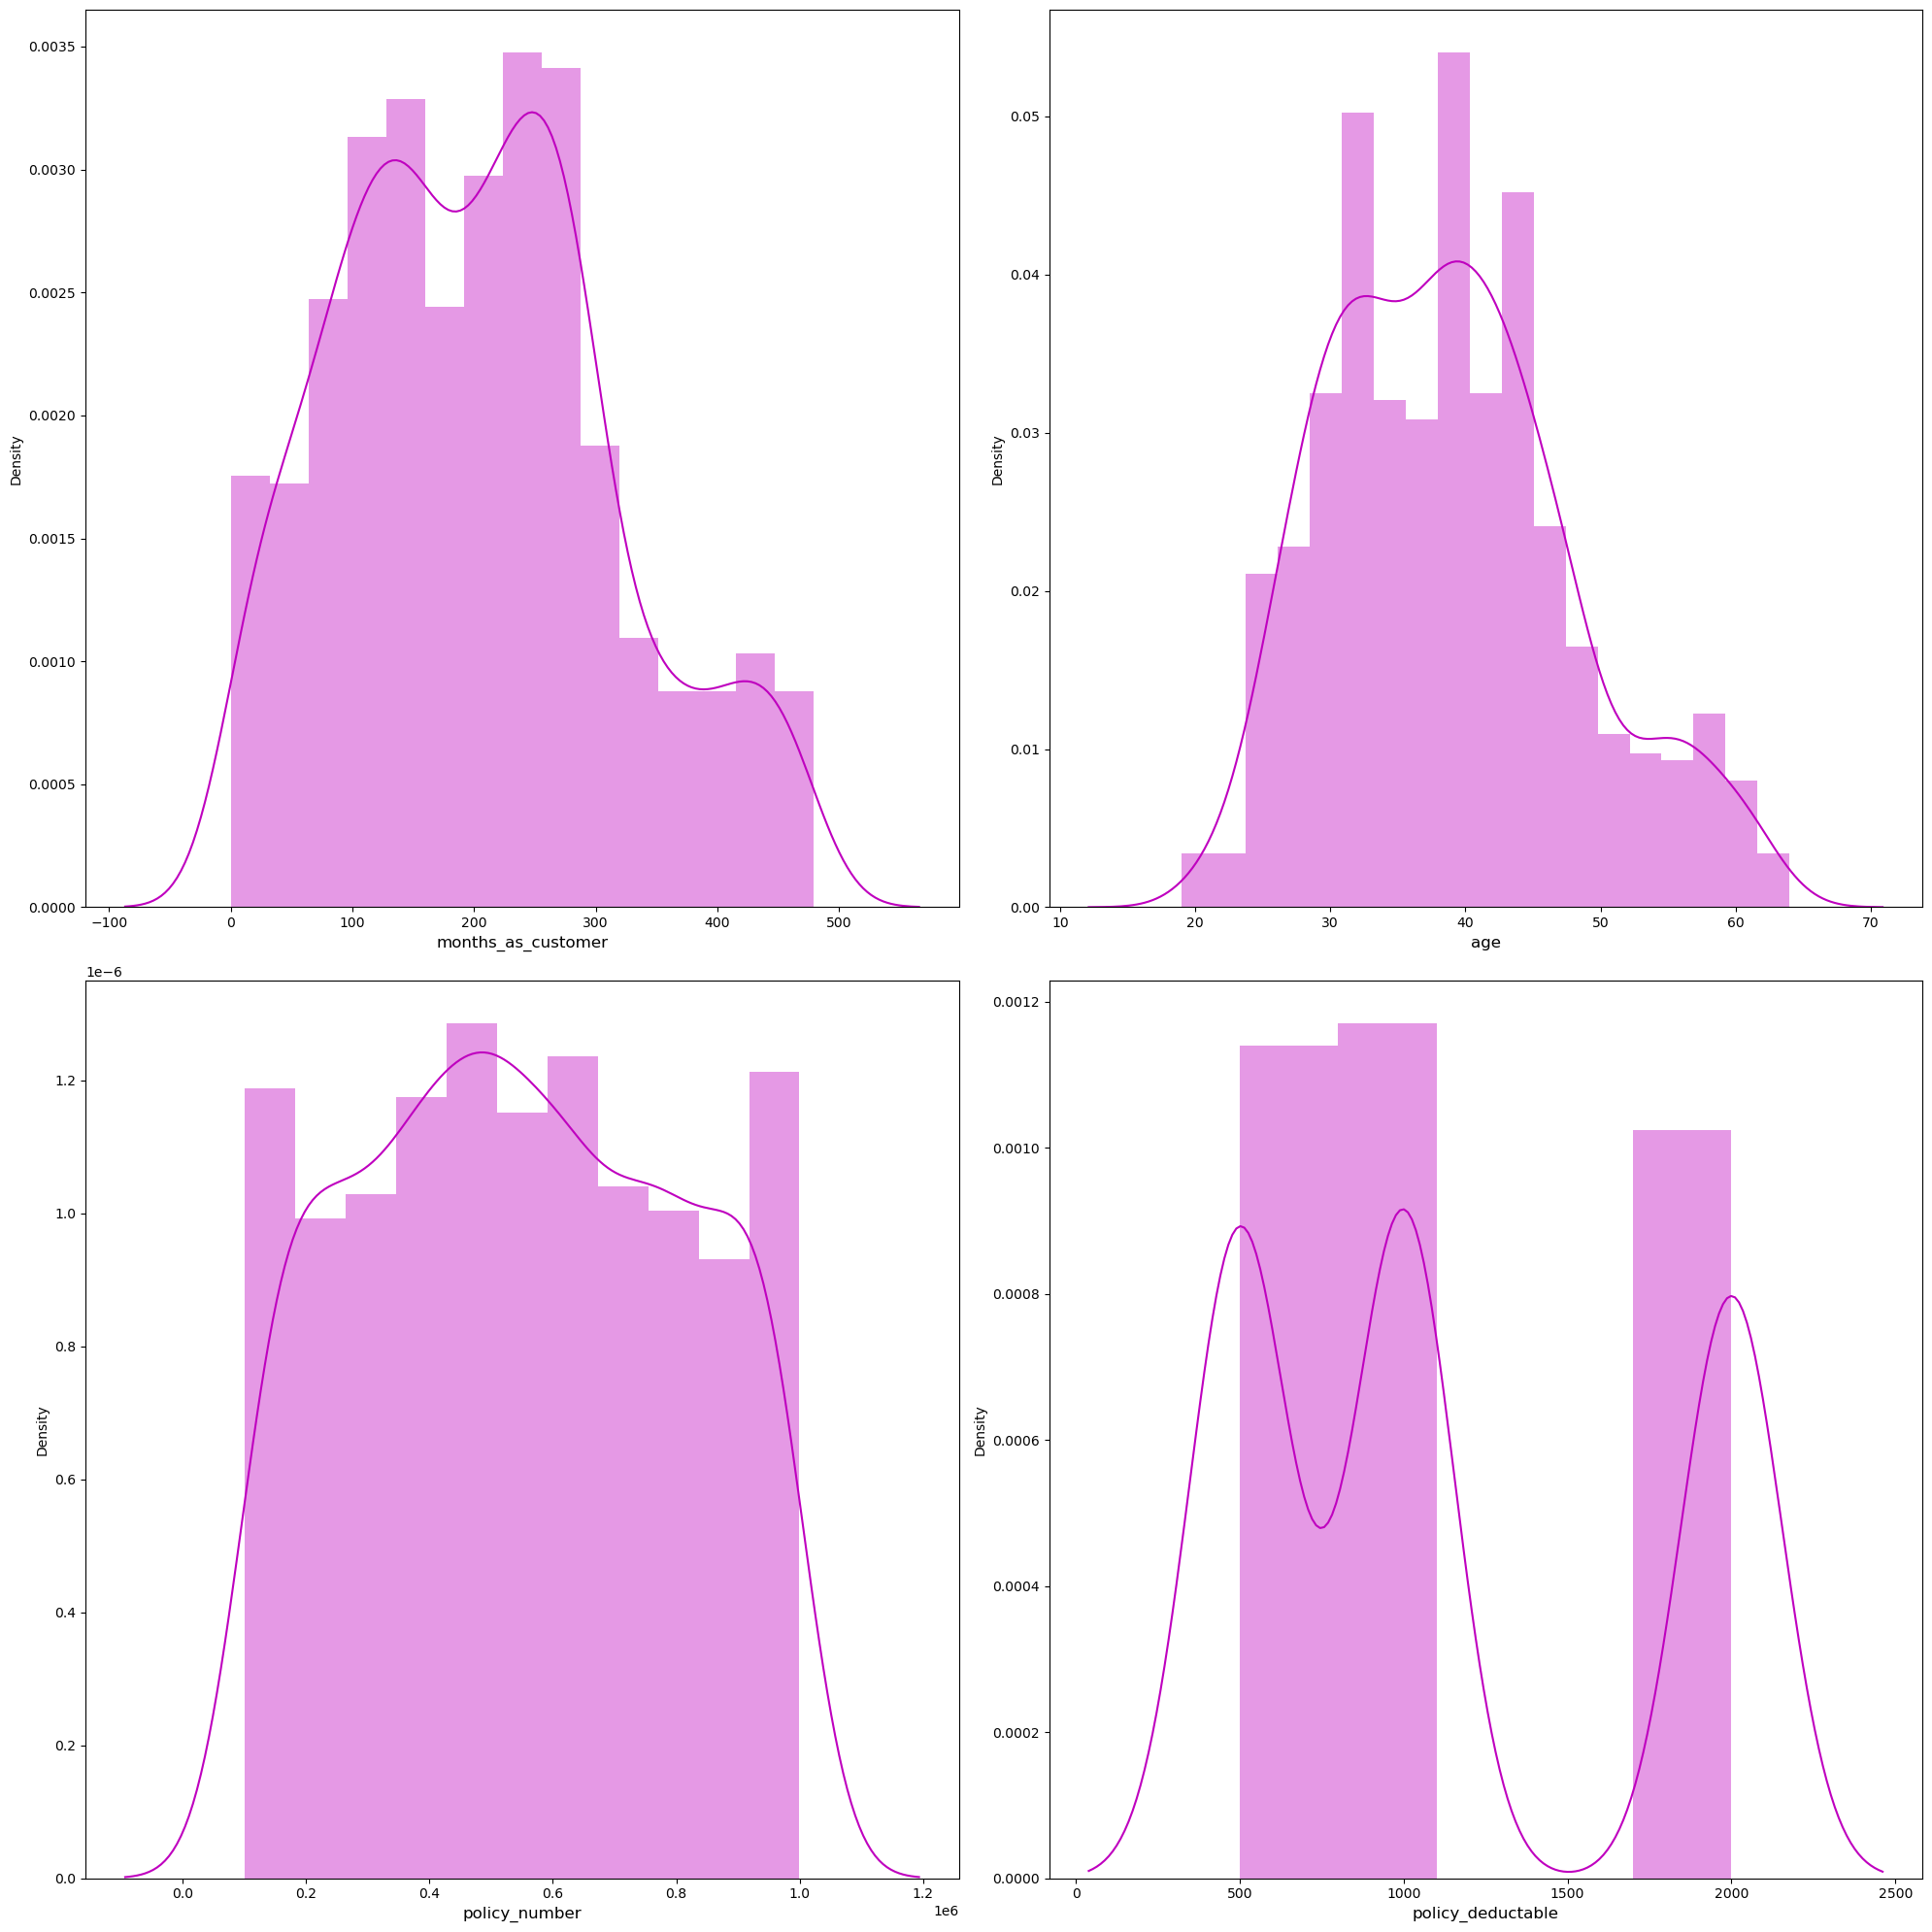

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
#numerical_columns = ['column1', 'column2', 'column3', 'column4']  # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()


loam amount ,applicant income and coapplicant income is skewed  to right

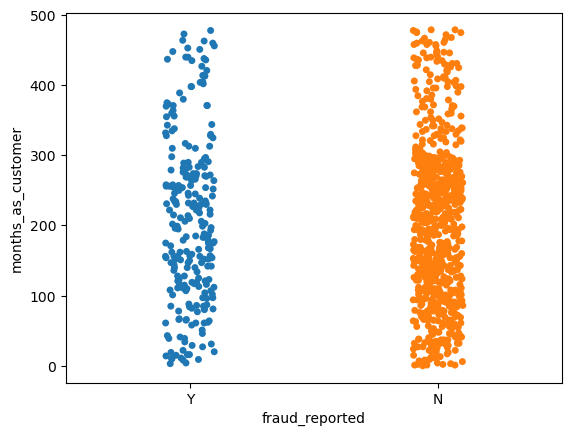

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.stripplot(x='fraud_reported', y='months_as_customer',data=data)
plt.show()

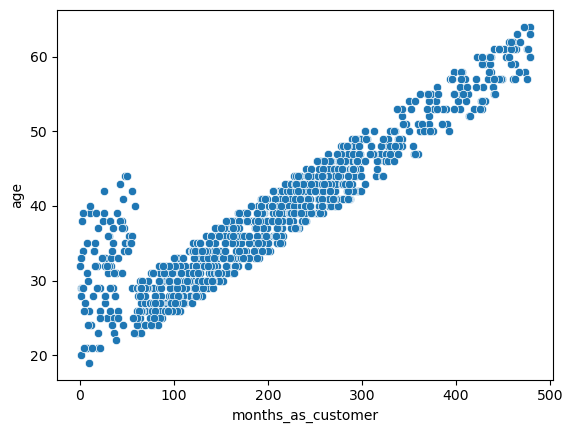

In [27]:
import matplotlib.pyplot as plt
sns.scatterplot(x='months_as_customer', y="age",data=data)
plt.show()


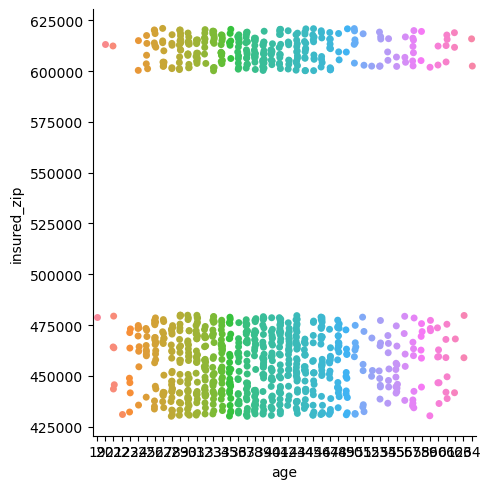

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='age', y='insured_zip', data=data)
plt.show()


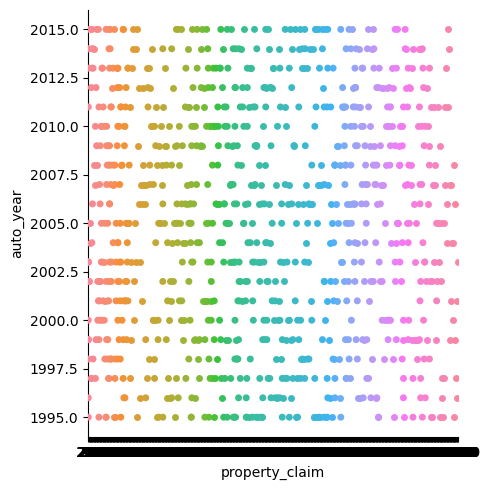

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='property_claim', y="auto_year",data=data)
plt.show()


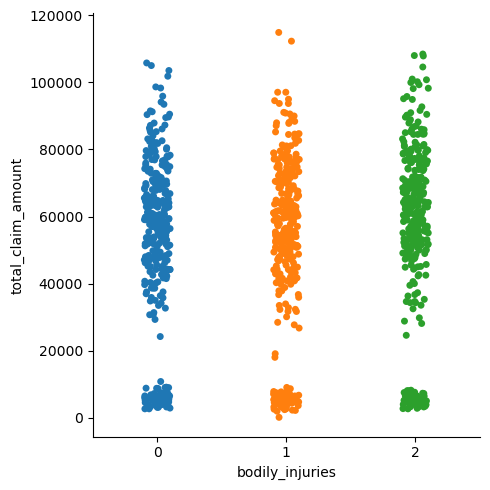

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='bodily_injuries', y='total_claim_amount', data=data)
plt.show()


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the DataFrame based on the condition
subset = data[data['fraud_reported']== 'Yes']

# Create the pairplot
sns.pairplot(subset, palette='Dark2')

# Display the plot
plt.show()



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


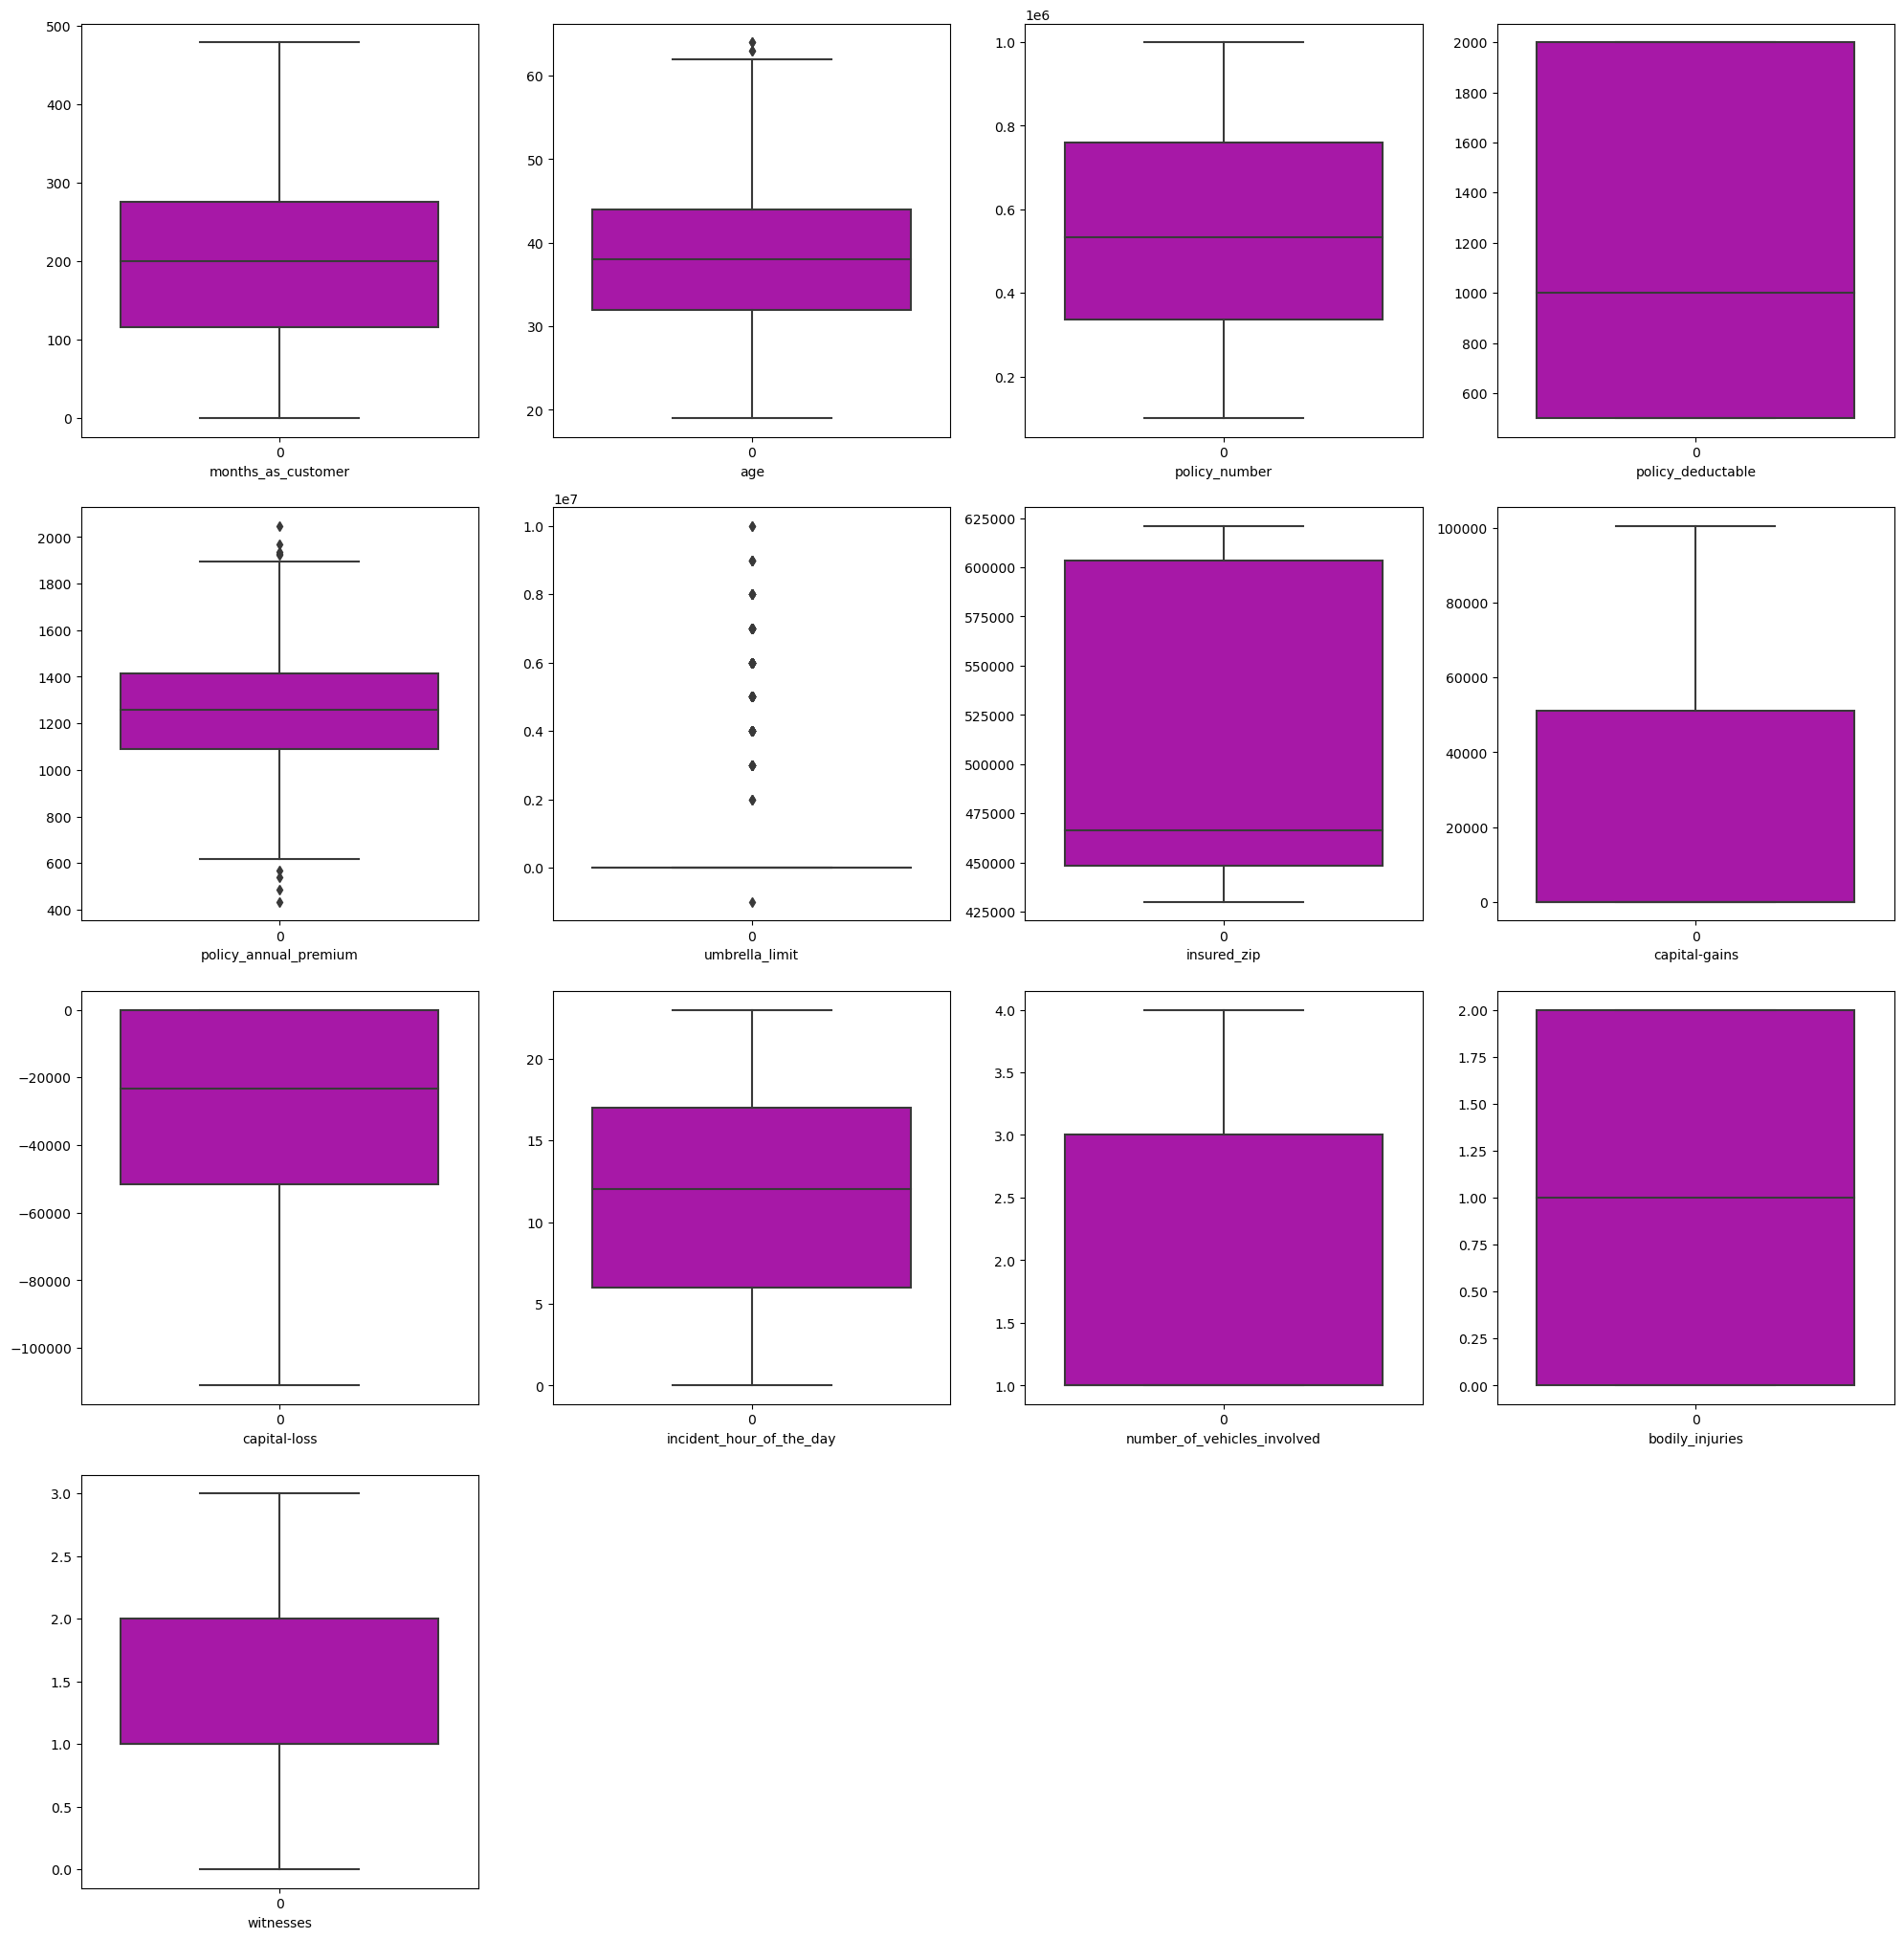

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 25))

p = 1
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns

for i in numeric_columns:
    if p <= 13:
        ax = plt.subplot(5, 4, p)
        sns.boxplot(data=data[i], color="m")
        plt.xlabel(i)
        p += 1

plt.tight_layout()
plt.show()


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


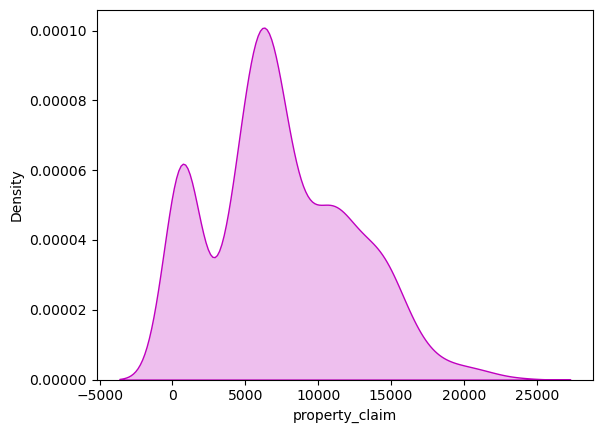

In [32]:
sns.distplot(data["property_claim"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()


 normalized

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


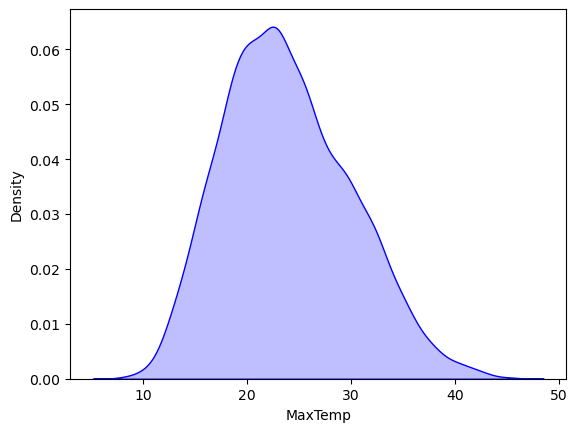

In [41]:
sns.distplot(data["bodily_injuries"], color="b", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


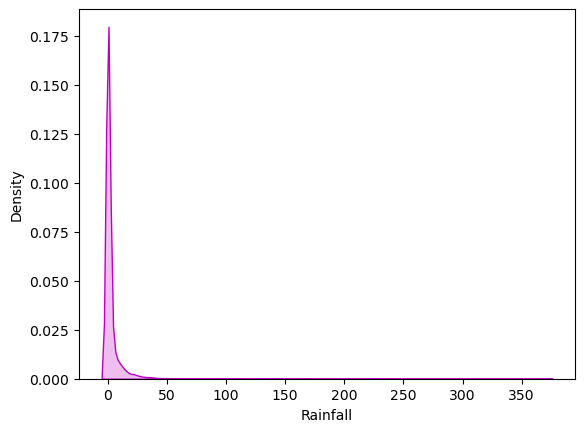

In [42]:
sns.distplot(data["total_claim_amount"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

left skewed

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


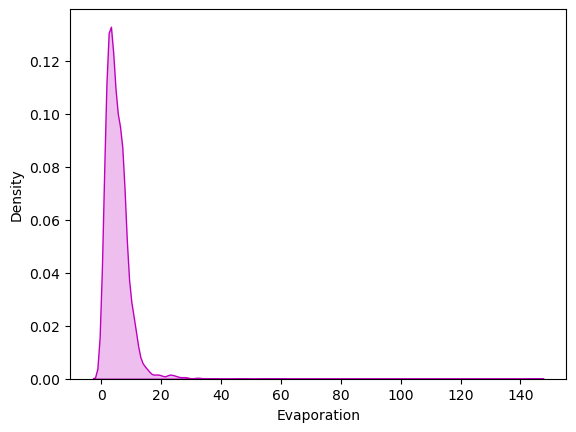

In [43]:
sns.distplot(data["months_as_customer"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

skewed data 

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


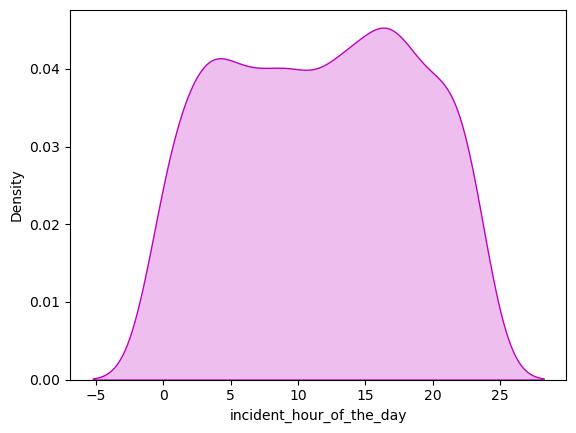

In [33]:
sns.distplot(data["incident_hour_of_the_day"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

binomial distribution

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


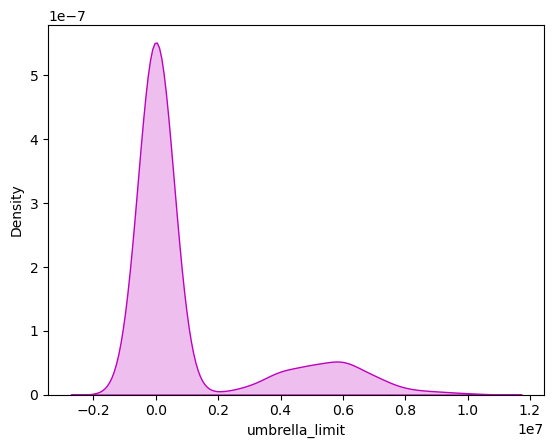

In [34]:
sns.distplot(data["umbrella_limit"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


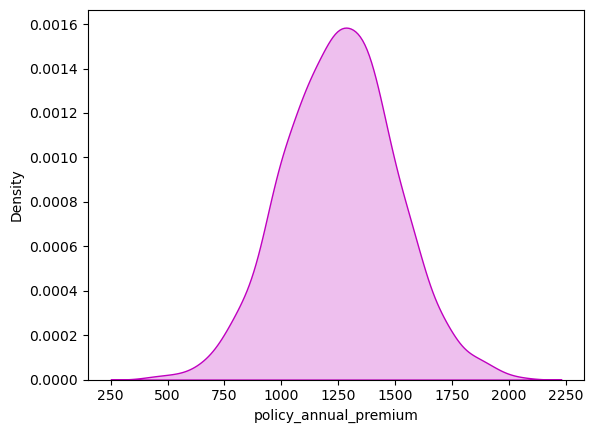

In [35]:
sns.distplot(data["policy_annual_premium"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


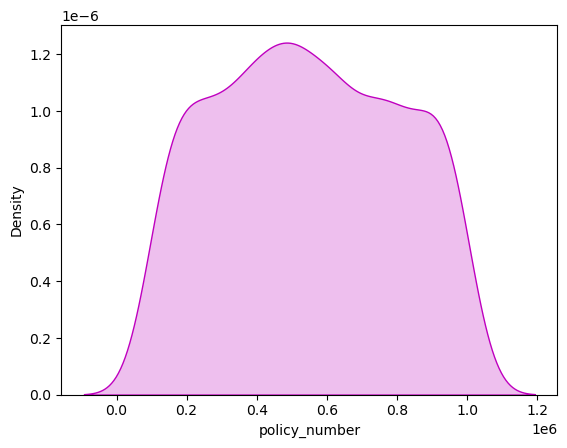

In [36]:
sns.distplot(data["policy_number"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

In [ ]:
right skewed

In [41]:
data.skew()# -05 to +0.5

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11900\3786652358.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()# -05 to +0.5


months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
_c39                                NaN
dtype: float64

data1.skew()# -05 to +0.5

Encoding Categorical Columns

In [43]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0,NaN
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0.0,5070,780,780,3510,8.0,12.0,2007,1.0,NaN
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0,NaN
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0,NaN
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0,NaN
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0,NaN
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0,NaN
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0,NaN


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [51]:
 data = data.fillna(data.mean())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2952\28529594.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


In [52]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


CORRELATION BETWEEN TARGET VARIABLE AND INDEPENDENT VARIABLE

In [53]:
corr=data.corr()
corr

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


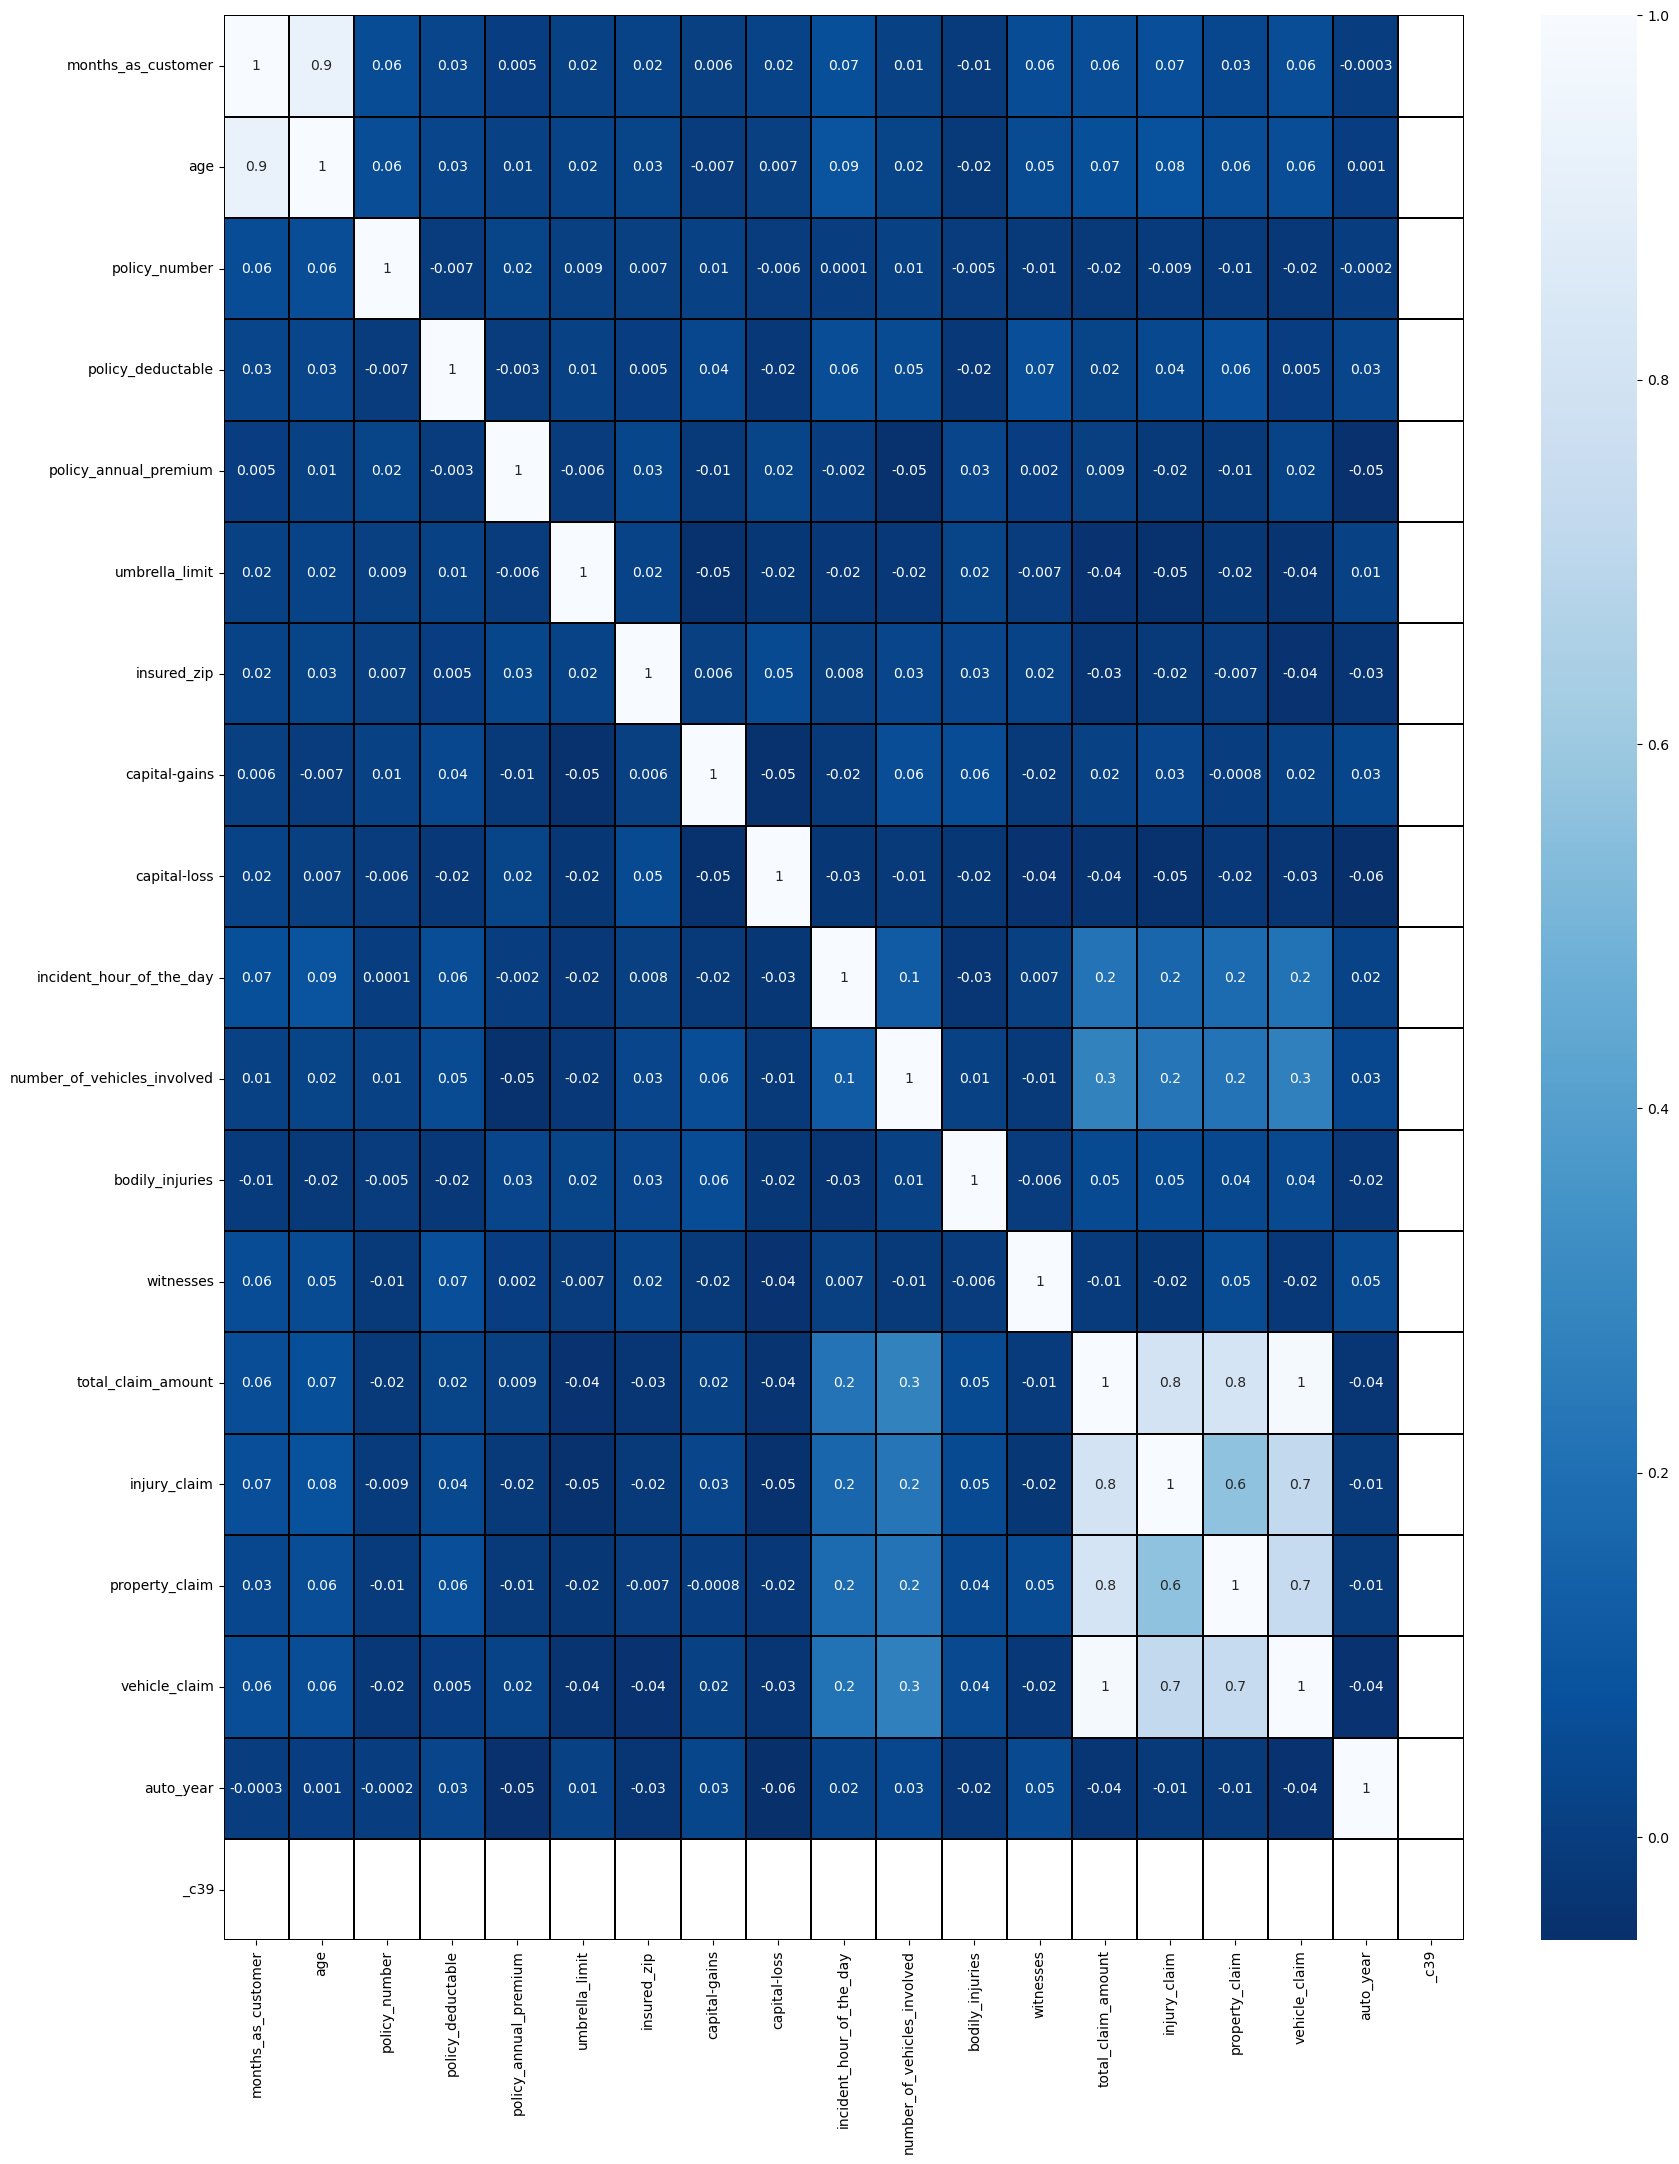

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

HEAT MAP CONSISTS OF BOTH POSITIVE AND NEGATIVE CORELATION. 

In [54]:
corr["months_as_customer"].sort_values(ascending=False)

months_as_customer             1.000000
age                            0.922098
incident_hour_of_the_day       0.070639
injury_claim                   0.065329
total_claim_amount             0.062108
vehicle_claim                  0.061013
witnesses                      0.058383
policy_number                  0.057555
property_claim                 0.034940
policy_deductable              0.026807
capital-loss                   0.020209
insured_zip                    0.017895
umbrella_limit                 0.015498
number_of_vehicles_involved    0.014736
capital-gains                  0.006399
policy_annual_premium          0.005018
auto_year                     -0.000292
bodily_injuries               -0.010162
Name: months_as_customer, dtype: float64

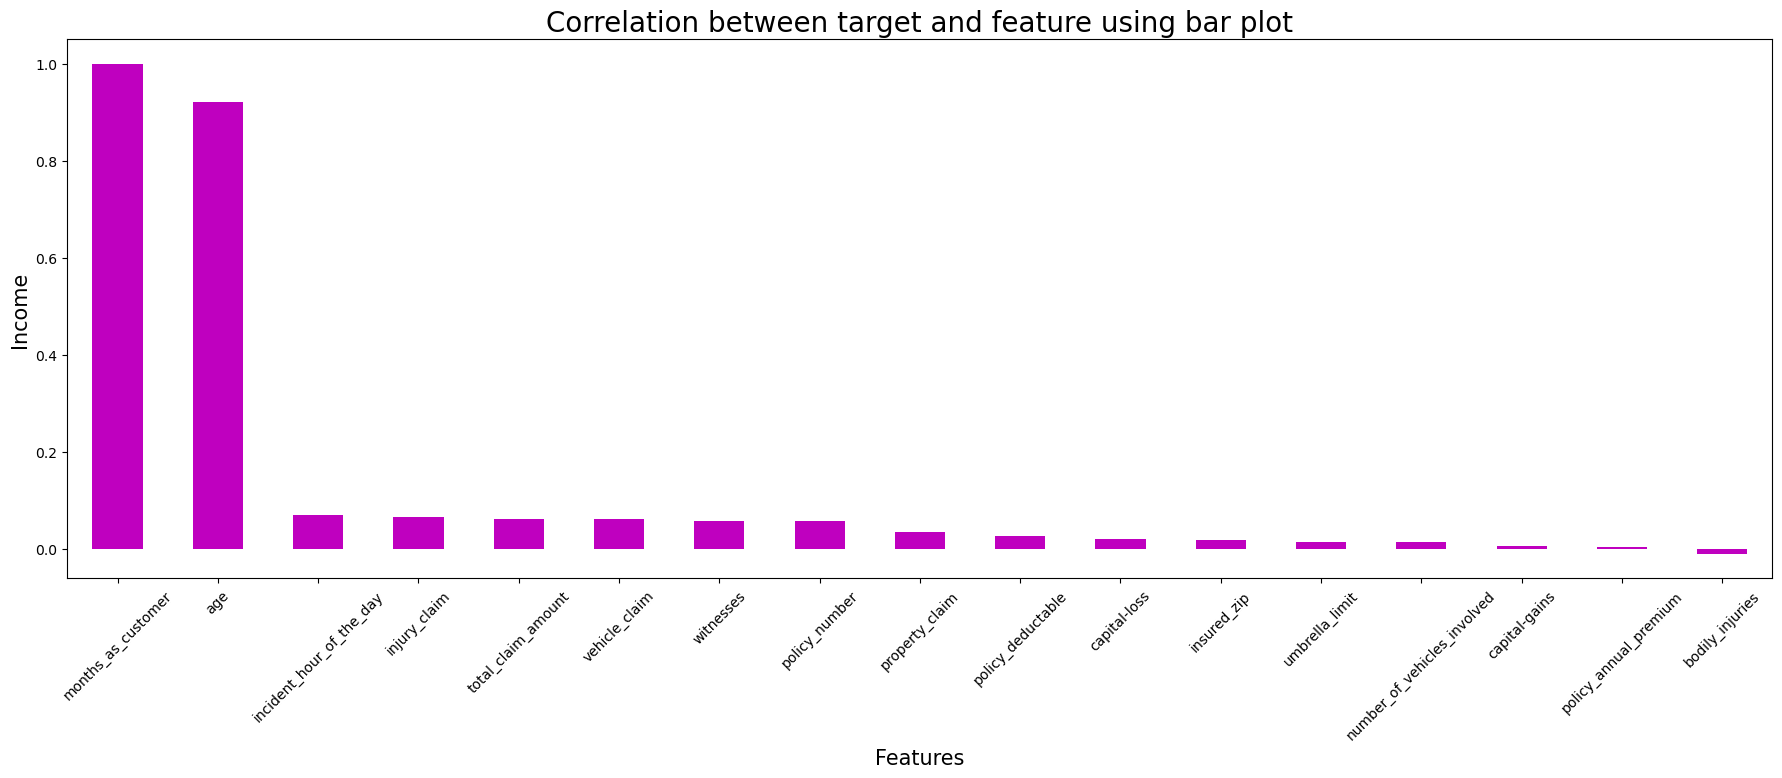

In [59]:
plt.figure(figsize=(22,7), facecolor="white")
data.corr()["months_as_customer"].sort_values(ascending=False).drop(["auto_year"]).plot(kind="bar",color="m")
plt.xlabel("Features", fontsize=15)  # Set a single x-label for all features
plt.ylabel("Income", fontsize=15)
plt.title("Correlation between target and feature using bar plot", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()


Seprating featires and labels

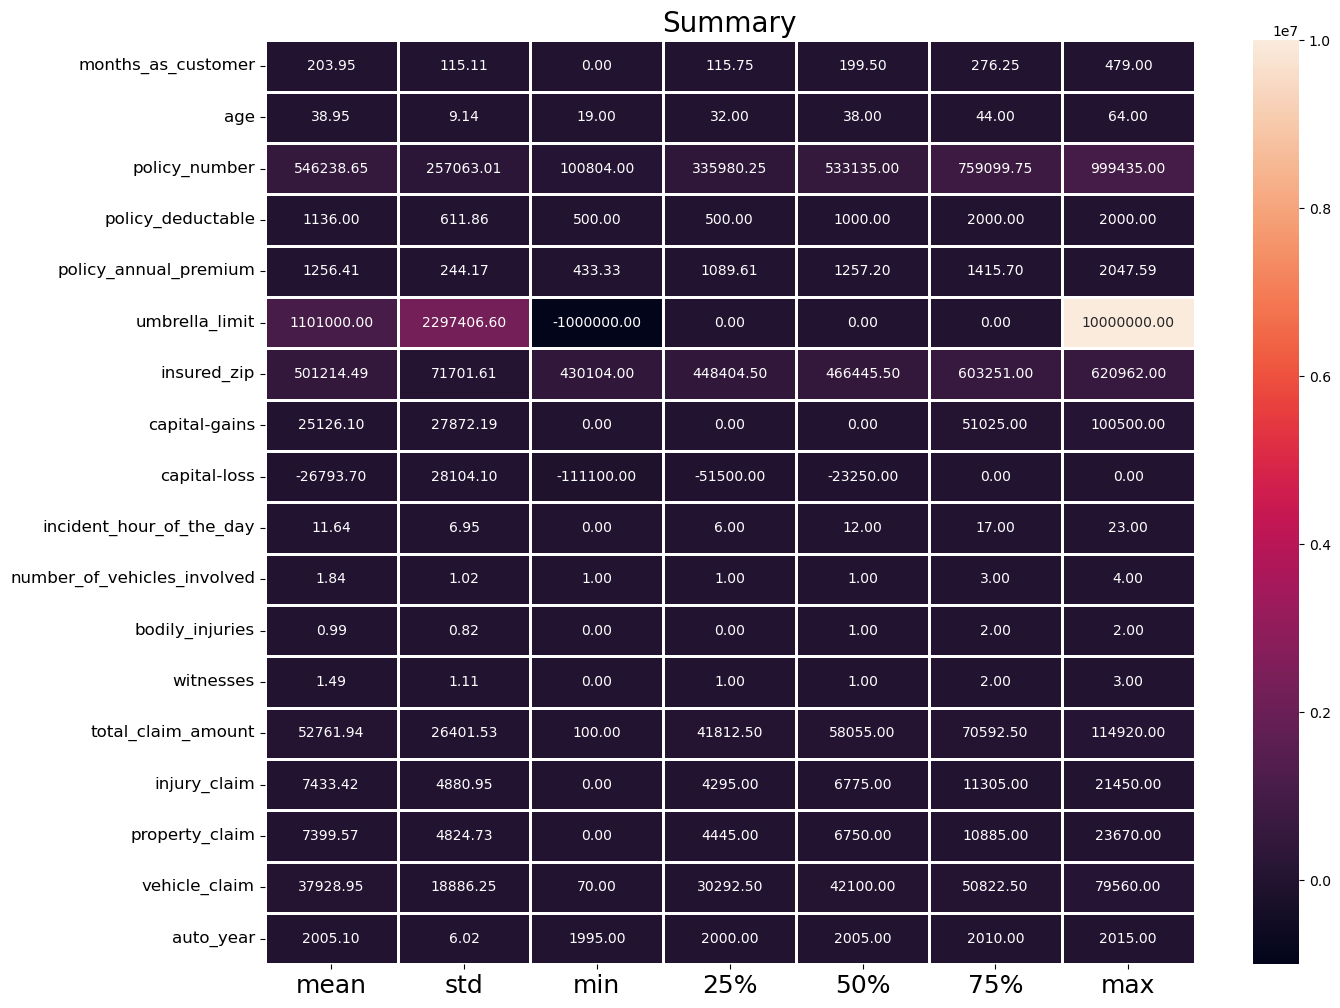

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(data.describe()[1:].transpose(), linewidths=2, annot=True, fmt=".2f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Summary", fontsize=20)

plt.show()


In [39]:
x=data.drop("fraud_reported",axis=1)
y=data["fraud_reported"]

In [61]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your data into the variable `x`
x = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

# Select only the numeric columns
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Apply StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_numeric)

print(x_scaled)



[[ 1.07813958  0.99083647 -0.09595307 ...  0.74965272 -0.1834404
          nan]
 [ 0.2089946   0.33407345 -0.79152739 ... -1.82334593  0.31549088
          nan]
 [-0.60800168 -1.08891308  0.55056594 ... -0.78556451  0.31549088
          nan]
 ...
 [-0.64276748 -0.54161057  1.44891961 ...  0.77190224 -1.5139238
          nan]
 [ 2.20802805  2.52328351 -0.04786687 ... -0.07357971 -1.18130295
          nan]
 [ 2.19064515  2.3043625   0.03830297 ... -1.81434017  0.31549088
          nan]]


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


CHECKING VARIANCE INFLATION(VIF)

In [66]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Fill missing values with column means
x_numeric = x_numeric.fillna(x_numeric.mean())

# Check if there are still missing or infinite values
missing_inf_cols = x_numeric.columns[x_numeric.isnull().any() | np.isinf(x_numeric).any()].tolist()
if missing_inf_cols:
    print("Columns with missing or infinite values:", missing_inf_cols)
else:
    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = x_numeric.columns
    vif_data["VIF"] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

    # Print VIF data
    print(vif_data)





Columns with missing or infinite values: ['_c39']


In [67]:
# dropping date column
x.drop("_c39",axis=1,inplace=True)

In [68]:

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

# Print VIF data
print(vif_data)


                        Feature         VIF
0            months_as_customer   28.054078
1                           age  130.169584
2                 policy_number    5.551620
3             policy_deductable    4.549119
4         policy_annual_premium   27.766073
5                umbrella_limit    1.239270
6                   insured_zip   50.373941
7                 capital-gains    1.842112
8                  capital-loss    1.935182
9      incident_hour_of_the_day    4.066136
10  number_of_vehicles_involved    4.676603
11              bodily_injuries    2.492770
12                    witnesses    2.854886
13           total_claim_amount         inf
14                 injury_claim         inf
15               property_claim         inf
16                vehicle_claim         inf
17                    auto_year  135.518476


C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [69]:
y.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

The data is not balanced since it is a classification problem

In [70]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Convert non-numeric values in x to numeric representation
x_numeric = x_numeric.apply(pd.to_numeric, errors='coerce')

# Convert non-numeric values in y to numeric representation using label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Ensure x and y have the same number of samples
min_samples = min(len(x_numeric), len(y_encoded))
x_numeric = x_numeric[:min_samples]
y_encoded = y_encoded[:min_samples]

# Apply SMOTE for oversampling
sm = SMOTE()
x_resampled, y_resampled = sm.fit_resample(x_numeric, y_encoded)





In [71]:
# Checking value count of target column
y.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

data is balanced

MODELLING

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Select the features (independent variables) and target (dependent variable)
x = data.iloc[:, :-1]  # All columns except the last one
y = data['fraud_reported'].astype('category')  # Target variable

# Perform data preprocessing
categorical_cols = x.select_dtypes(include=['object']).columns
numeric_cols = x.select_dtypes(include=['float64', 'int64']).columns

imputer = SimpleImputer(strategy='mean')
x_numeric = pd.DataFrame(imputer.fit_transform(x[numeric_cols]), columns=numeric_cols)

encoder = OneHotEncoder(sparse=False, drop='first')
x_categorical = pd.DataFrame(encoder.fit_transform(x[categorical_cols]), columns=encoder.get_feature_names(categorical_cols))

x_processed = pd.concat([x_numeric, x_categorical], axis=1)

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_processed), columns=x_processed.columns)

maxAcc = 0
maxRS = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    predict = RFR.predict(x_test)
    acc = accuracy_score(y_test, predict)
    
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Best Accuracy is", maxAcc, "on random state", maxRS)



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Best Accuracy is 0.8033333333333333 on random state 16


In [84]:
# cREATING TRAIN TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [85]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score






In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

RFC = RandomForestClassifier()
RFC.fit(x_train, np.array(y_train))
pred_RFC = RFC.predict(x_test)
pred_train = RFC.predict(x_train)
print(accuracy_score(y_test, pred_RFC))
print(confusion_matrix(y_test, pred_RFC))



0.7633333333333333
[[226   3]
 [ 68   3]]


In [93]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print(accuracy_score(y_test,pred_LR))
print(confusion_matrix(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

0.7666666666666667
[[229   0]
 [ 70   1]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       229
           Y       1.00      0.01      0.03        71

    accuracy                           0.77       300
   macro avg       0.88      0.51      0.45       300
weighted avg       0.82      0.77      0.67       300



In [94]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
pred_train=svc.predict(x_train)

print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.7633333333333333
[[229   0]
 [ 71   0]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.87       229
           Y       0.00      0.00      0.00        71

    accuracy                           0.76       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.58      0.76      0.66       300



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
pred_train=ABC.predict(x_train)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

0.8
[[203  26]
 [ 34  37]]
              precision    recall  f1-score   support

           N       0.86      0.89      0.87       229
           Y       0.59      0.52      0.55        71

    accuracy                           0.80       300
   macro avg       0.72      0.70      0.71       300
weighted avg       0.79      0.80      0.80       300



In [96]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
pred_train=BC.predict(x_train)

print(accuracy_score(y_test,pred_BC))
print(confusion_matrix(y_test,pred_BC))
print(classification_report(y_test,pred_BC))

0.8133333333333334
[[203  26]
 [ 30  41]]
              precision    recall  f1-score   support

           N       0.87      0.89      0.88       229
           Y       0.61      0.58      0.59        71

    accuracy                           0.81       300
   macro avg       0.74      0.73      0.74       300
weighted avg       0.81      0.81      0.81       300



In [97]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)

print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))

0.76
[[224   5]
 [ 67   4]]
              precision    recall  f1-score   support

           N       0.77      0.98      0.86       229
           Y       0.44      0.06      0.10        71

    accuracy                           0.76       300
   macro avg       0.61      0.52      0.48       300
weighted avg       0.69      0.76      0.68       300



In [98]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_RFC)-score.mean())*100)

[nan nan nan nan nan]
nan
difference between ACCURACY score and cross validation score is - nan


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-p

In [99]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_svc)-score.mean())*100)

[nan nan nan nan nan]
nan
difference between ACCURACY score and cross validation score is - nan


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages

In [100]:
ABC=AdaBoostClassifier()
from sklearn.model_selection import cross_val_score
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
pred_train=ABC.predict(x_train)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_ABC)-score.mean())*100)

0.8
[[203  26]
 [ 34  37]]
              precision    recall  f1-score   support

           N       0.86      0.89      0.87       229
           Y       0.59      0.52      0.55        71

    accuracy                           0.80       300
   macro avg       0.72      0.70      0.71       300
weighted avg       0.79      0.80      0.80       300

[nan nan nan nan nan]
nan
difference between ACCURACY score and cross validation score is - nan


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 145, in fit
    sample_weight, estimator_weight, estimator_error = 

In [101]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_BC)-score.mean())*100)

[nan nan nan nan nan]
nan
difference between ACCURACY score and cross validation score is - nan


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 394, in _fit
    all_results = Parallel(
  File "C:\U

In [102]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)

print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))
score6=cross_val_score(ET,x,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(accuracy_score(y_test,pred_ET)-score6.mean())*100)

0.7666666666666667
[[223   6]
 [ 64   7]]
              precision    recall  f1-score   support

           N       0.78      0.97      0.86       229
           Y       0.54      0.10      0.17        71

    accuracy                           0.77       300
   macro avg       0.66      0.54      0.52       300
weighted avg       0.72      0.77      0.70       300

[nan nan nan nan nan]
nan
difference between r2 score and cross validation score is - nan


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-p

HYPER PARAMETER TUNING

In [103]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'criterion': ['gini','entropy'],
    'random_state': [10,50,1000],
    'max_depth': [0,10,20],
    'n_jobs': [-2,-1,1],
    'n_estimators': [50, 100, 200, 300]
}

gscv = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)
gscv.fit(x_train, y_train)

exception calling callback for <Future at 0x6a089467c0 state=finished raised ValueError>
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\parallel.py", line 834, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 556, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "C:\Us

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [104]:
best_params = gscv.best_params_
print(best_params)


{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50, 'n_jobs': -2, 'random_state': 1000}


In [105]:
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=200, n_jobs=-2, random_state=10)


In [106]:
from sklearn.metrics import accuracy_score

Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc * 100)


76.33333333333333


PLOTTING ROC AND COMPARE AUC FOR MODELS

In [107]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


TypeError: predict_proba() missing 1 required positional argument: 'X'

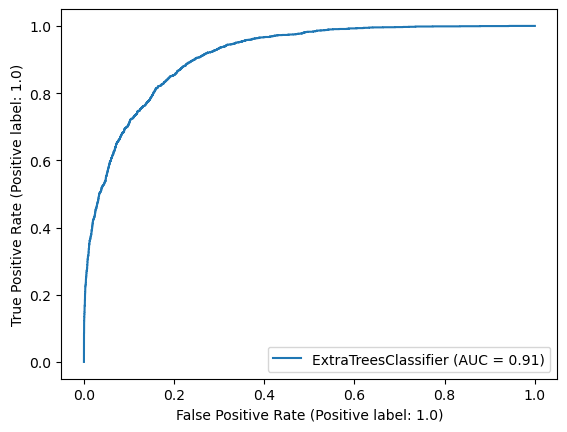

In [102]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

disp = plot_roc_curve(Final_model, x_test, y_test)
plot_roc_curve(RandomForestClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LogisticRegression, x_test, y_test, ax=disp.ax_)
plot_roc_curve(SVC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GradientBoostingClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(AdaBoostClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BaggingClassifier, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size': 11}, loc='lower right')
plt.show()


In [108]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = Final_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


ValueError: y_true takes value in {'N', 'Y'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [109]:
import joblib

joblib.dump(Final_model, 'insurance fraud.pkl')

model = joblib.load('insurance fraud.pkl')

# Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted'] = prediction
data['Original'] = a

